In [1]:
import os, sys
import numpy as np
from math import fsum
import matplotlib.pyplot as plt

PROJECT_DIR = os.path.abspath('../code')
sys.path.append(PROJECT_DIR)

In [2]:
# Import main classes.
from src.genome.gene import Gene
from src.genome.chromosome import Chromosome
from src.engines.standard_ga import StandardGA

# Import Selection Operators.
from src.operators.selection.tournament_selector import TournamentSelector
from src.operators.selection.linear_rank_selector import LinearRankSelector

# Import Crossover Operators.
from src.operators.crossover.uniform_crossover import UniformCrossover
from src.operators.crossover.single_point_crossover import SinglePointCrossover

# Import Mutation Operators.
from src.operators.mutation.swap_mutator import SwapMutator
from src.operators.mutation.random_mutator import RandomMutator

## Booth optimization

In [3]:
# Booth function.
def fun_Booth(_chromosome):
    
    # Extract the gene values as 'x' and 'y'.
    x, y = _chromosome[0].datum, _chromosome[1].datum
    
    # Compute the Booth function at (x, y).
    f_val = (x + 2.0*y - 7.0)**2 + (2.0*x + y - 5.0)**2
    
    # Return the negative (to account for minimization).
    return -f_val
# _end_def_

# Random function ~U(-10, +10)
_func = lambda: np.random.uniform(-10.0, +10.001)

In [4]:
# Define the number of chromosomes.
N = 100

# Initial population.
population = [Chromosome([Gene(np.random.uniform(-10.0, +10.0), _func),
                          Gene(np.random.uniform(-10.0, +10.0), _func)], np.nan, True)
              for i in range(N)]

# Set the fitness function.
fun_optim = fun_Booth

# Create the StandardGA.
toy_GA = StandardGA(initial_pop=population, fit_func=fun_optim,
                    select_op=LinearRankSelector(),
                    mutate_op=RandomMutator(0.1),
                    cross_op=UniformCrossover())

In [5]:
toy_GA.run(epochs=2500, elitism=True, f_tol=1.0e-6, verbose=False)

Initial Avg. Fitness = -327.4026
Final Avg. Fitness = -2.8935
Elapsed time: 14.505 seconds.


In [6]:
toy_GA.best_chromosome().fitness, toy_GA.best_chromosome()._genome

(-3.550863621818493e-06,
 [Gene(datum=0.9985964461215922, _func=<function <lambda> at 0x11e52f760>, valid=True),
  Gene(datum=3.0010914445659775, _func=<function <lambda> at 0x11e52f760>, valid=True)])

In [7]:
toy_GA.print_operator_stats()

 UniformCrossover: (4803778080)
 _probability: 0.9
 _rng: Generator(PCG64)
 _counter: 125000

 LinearRankSelector: (4803478368)
 _probability: 1.0
 _rng: Generator(PCG64)
 _counter: 2500

 RandomMutator: (4803482448)
 _probability: 0.1
 _rng: Generator(PCG64)
 _counter: 25041



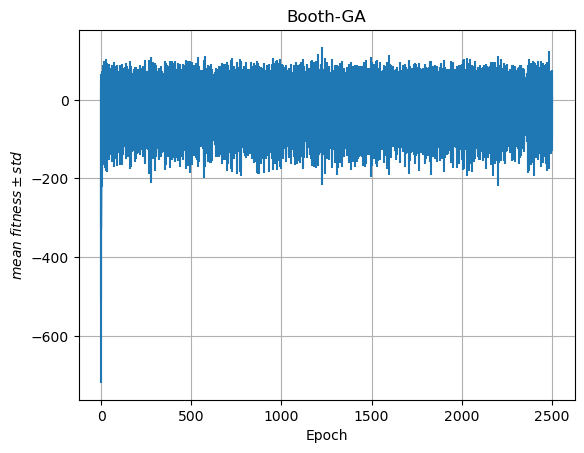

In [8]:
plt.errorbar(x=range(len(toy_GA.stats['avg'])),
             y=toy_GA.stats['avg'], yerr=toy_GA.stats['std'])

plt.grid(True)
plt.title("Booth-GA")
plt.xlabel("Epoch")
plt.ylabel("$mean~fitness \pm std$");